# Initialize

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from classy_sz import Class
import classy_sz
classy_sz.__file__

Metal device set to: Apple M1 Pro


2023-03-28 01:52:32.092931: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-28 01:52:32.093048: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


'/Users/boris/opt/miniconda3/lib/python3.9/site-packages/classy_sz-2.9.4-py3.9-macosx-11.0-arm64.egg/classy_sz.cpython-39-darwin.so'

In [2]:
#plotting settings
plot_params= {
    'figure.figsize': (8,6),
    'axes.labelsize': 15,
    'axes.grid': True,
    'grid.alpha': 0.2,
    'grid.linestyle':'--',
    'axes.grid.which': 'both',
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'legend.fontsize': 13,
    'xtick.minor.visible': True,
    'ytick.minor.visible': True,
    'xtick.major.size': 7,
    'xtick.minor.size': 3,
    'ytick.major.size': 7,
    'ytick.minor.size': 3,
    'axes.titlesize': 20,
    'xtick.major.size':5,
    'ytick.major.size':5,
    'xtick.major.pad':10,
    'ytick.major.pad':5,
    'xtick.direction':'in',
    'ytick.direction':'in',
    'xtick.minor.visible': True,
    'ytick.minor.visible': True,
    
}
plt.rcParams.update(plot_params)

In [3]:
# the parameters needed for cosmology:
# use the last column of Planck 2018 (https://arxiv.org/pdf/1807.06209.pdf) Table 2
# TT,TE,EE+lowE+lensing+BAO
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators.
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,

'k_pivot': 0.05,
'N_ncdm': 1,
'N_ur': 2.0328,
'm_ncdm': 0.06}

In [20]:
zmin=0.005 
zmax=15.
param_dict={
    'output':'mPk,dndlnM',
    'non_linear': 'hmcode',
    'z_max_pk':15.,
       }

In [21]:
%%time
M = Class()
M.set(cosmo_params)
M.set(param_dict)
M.compute()


CPU times: user 12.7 s, sys: 33.4 ms, total: 12.7 s
Wall time: 1.92 s


# lensing kernel

In [32]:
%%time
z_array_2d = np.linspace(0.01,3.,500)
log10l = np.linspace(np.log10(1e0),np.log10(1e3),500)
kappa_2d = np.zeros((500,500))
izp = 0
ilq = 0
for zp in z_array_2d:
    ilq=0
    for lm in log10l:
        kappa_2d[izp][ilq] = kappa_kernel(10**lm,zp)
        ilq+=1
    izp+=1

CPU times: user 2.19 s, sys: 12.3 ms, total: 2.2 s
Wall time: 2.2 s


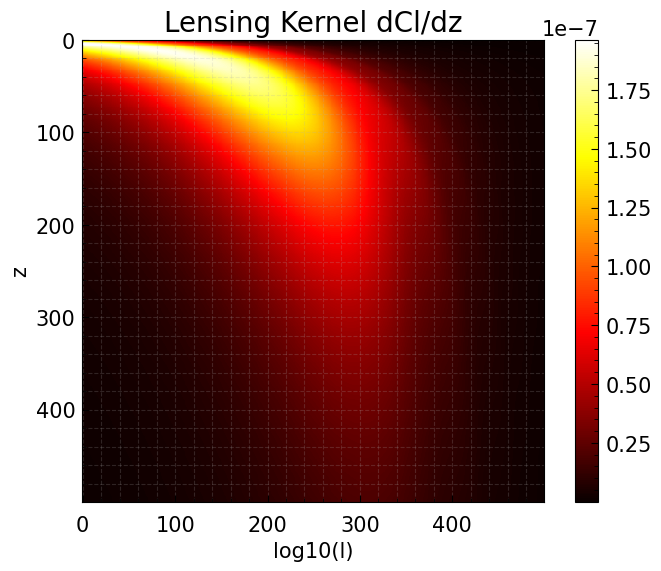

In [33]:
im = plt.imshow(kappa_2d, cmap='hot', interpolation='nearest')
cbar = plt.colorbar(im) # adding the colobar on the right
# cbar.set_label('dy/dzdm',size=18)
plt.xlabel('log10(l)')
plt.ylabel('z')
# plt.show()
plt.title('Lensing Kernel dCl/dz')
plt.savefig('figures/kappa_kernel_heatmap.pdf')